<a href="https://colab.research.google.com/github/Tolulope-Akinmoju/AdventureWorks-PowerBI-Sales-Dashboard/blob/main/HR_AdvML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import statsmodels.api as sm
from statsmodels.formula.api import ols

import patsy
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model







In [26]:

##Import Data
data= "/content/ClickedMSHR_MachineLearning.csv"
#column_names = ['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
     #'EducationField' , 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
    # 'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
     #'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
    # 'YearsWithCurrManager']#
raw_dataset = pd.read_csv(data)

In [27]:
dataset =raw_dataset.copy()
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


Check for NA Values ad Dtrop if Need Be


In [28]:
dataset.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [29]:
dataset = dataset.dropna()

In [30]:
#print all of the dat types and their unique values
for column in dataset.columns:
  if dataset[column].dtype == object:
    print(str(column) + ' : ' + str(dataset[column].unique()))
    print(dataset[column].value_counts())
    print('________________________')

Attrition : ['No' 'Yes']
Attrition
No     3677
Yes     705
Name: count, dtype: int64
________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        3109
Travel_Frequently     825
Non-Travel            448
Name: count, dtype: int64
________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    2865
Sales                     1330
Human Resources            187
Name: count, dtype: int64
________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       1806
Medical             1385
Marketing            475
Technical Degree     392
Other                244
Human Resources       80
Name: count, dtype: int64
________________________
Gender : ['Female' 'Male']
Gender
Male      2626
Female    1756
Name: count, dtype: int64
________________________
JobRole : ['Healthcare 

In [36]:
dataset.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,2.912369,1.0,2207.804884,2.063898,65061.702419,2.693291,15.210634,8.0,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,8.105396,1.024728,0.0,1271.688783,1.106115,47142.310175,2.497832,3.663007,0.0,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1108.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2208.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3308.750000,3.000000,83790.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [41]:
dataset['Gender'].value_counts()




Gender
Male      2626
Female    1756
Name: count, dtype: int64

In [42]:
dataset['count'] = 1

In [46]:
dataset.groupby(['Gender', 'Attrition']).agg({'count' :'sum'})

count
Gender Attrition       
Female No          1488
       Yes          268
Male   No          2189
       Yes          437

In [47]:
268/(268+1488)

0.15261958997722094

In [48]:
437/(437+2189)

0.16641279512566642

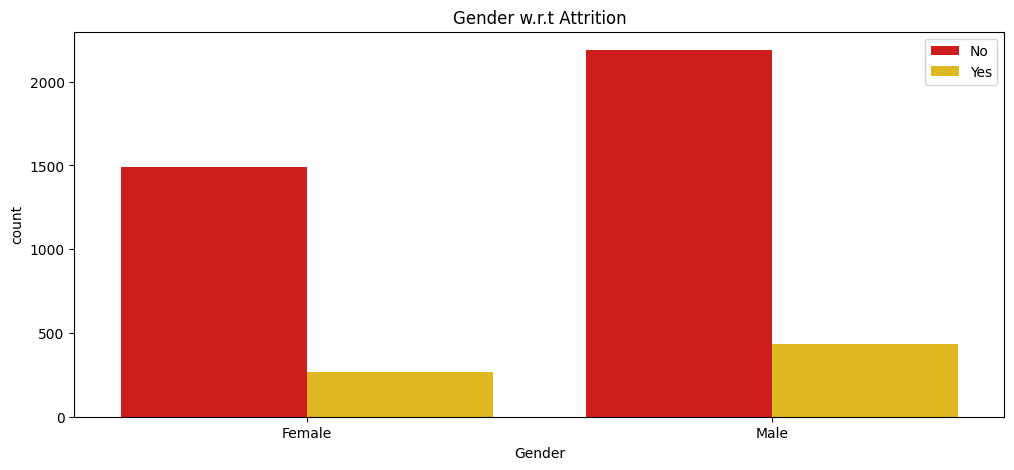

In [55]:


plt.figure(figsize=(12,5))
sns.countplot(x='Gender', hue='Attrition', data =dataset, palette = 'hot')
plt.title('Gender w.r.t Attrition')
plt.legend(loc='best')
plt.show()

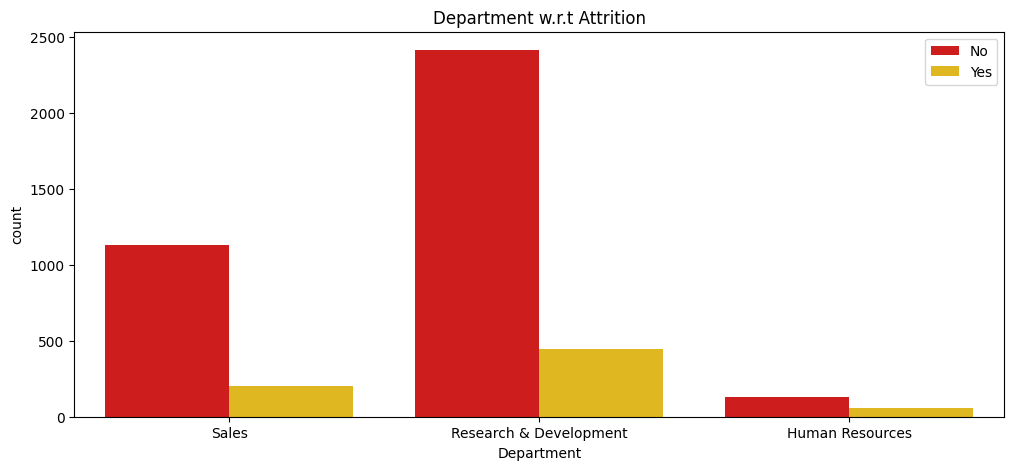

In [56]:
plt.figure(figsize=(12,5))
sns.countplot(x='Department', hue='Attrition', data =dataset, palette = 'hot')
plt.title('Department w.r.t Attrition')
plt.legend(loc='best')
plt.show()

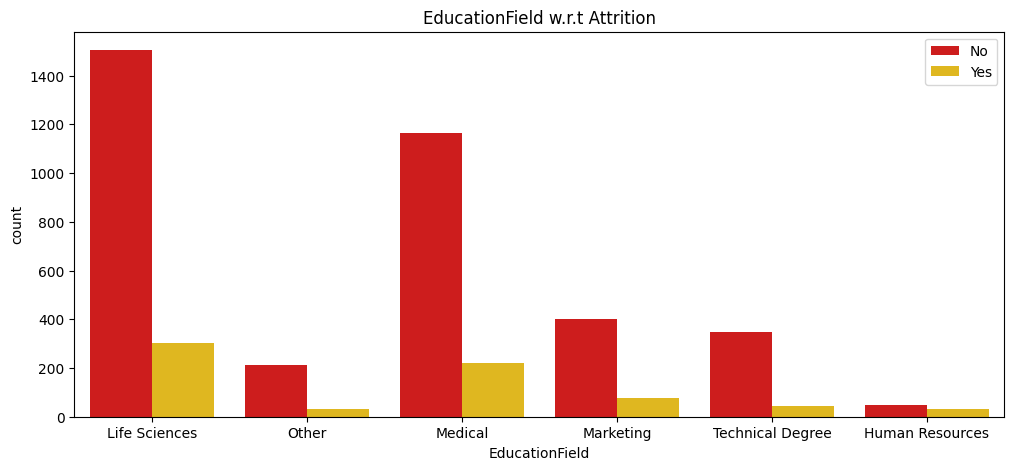

In [57]:
plt.figure(figsize=(12,5))
sns.countplot(x='EducationField', hue='Attrition', data =dataset, palette = 'hot')
plt.title('EducationField w.r.t Attrition')
plt.legend(loc='best')
plt.show()

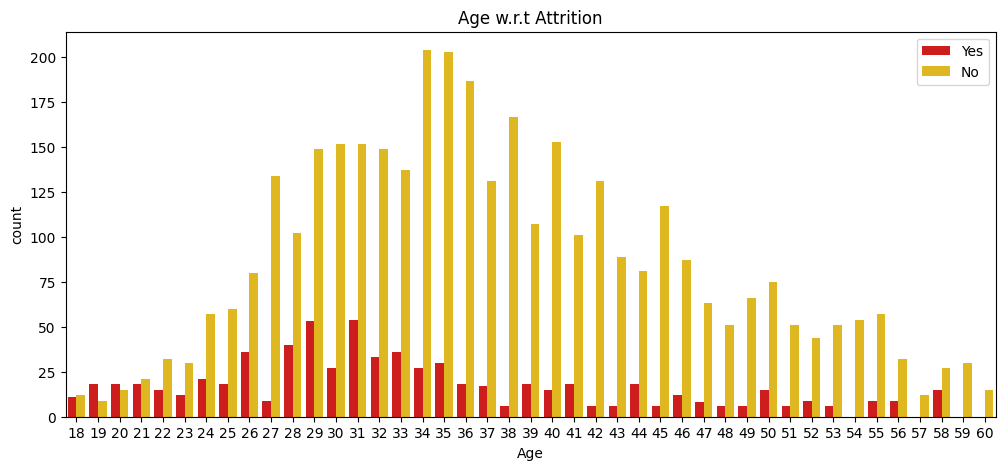

In [59]:
plt.figure(figsize=(12,5))
sns.countplot(x='Age', hue='Attrition', data =dataset, palette = 'hot')
plt.title('Age w.r.t Attrition')
plt.legend(loc='best')
plt.show()

In [65]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,count
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,Y,11,8,0,1.0,6,1,0,0,1
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,Y,23,8,1,6.0,3,5,1,4,1
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,Y,15,8,3,5.0,2,5,0,3,1
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,Y,11,8,3,13.0,5,8,7,5,1
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,Y,12,8,2,9.0,2,6,0,4,1


In [66]:
dataset=dataset.drop('Over18', axis = 1)
dataset=dataset.drop('EmployeeID', axis = 1)
dataset=dataset.drop('EmployeeCount', axis = 1)
dataset=dataset.drop('StandardHours', axis = 1)

In [67]:
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,count
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,131160,1.0,11,0,1.0,6,1,0,0,1
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,41890,0.0,23,1,6.0,3,5,1,4,1
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,193280,1.0,15,3,5.0,2,5,0,3,1
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,83210,3.0,11,3,13.0,5,8,7,5,1
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,23420,4.0,12,2,9.0,2,6,0,4,1


One hot encoding

In [71]:
#binary encoding
dataset['Gender'] = dataset['Gender'].map({'Male' : 0, 'Female' :1})

In [73]:
#encode categorical columns which are ordinal
from sklearn.preprocessing import LabelEncoder
encoding_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
label_encoders = {}
for column in encoding_cols:
  label_encoders[column] = LabelEncoder()
  dataset[column] = label_encoders[column]. fit_transform(dataset[column])

In [ ]:
dataset = head()

In [ ]:
#create category maps

dataset['Education'] = dataset['Education'].map({1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'})
dataset['JobLevel'] = dataset['JobLevel'].map({1: 'Entry', 2: 'Mid', 3: 'Senior', 4: 'Expert', 5: 'Executive'})
dataset['StockOptionLevel'] = dataset['StockOptionLevel'].map({0: 'Low', 1: 'Medium', 2: 'High', 3: 'Very High'})

In [ ]:
#Onehot encode variables
dataset = pd.get_dummies(dataset, columns= ['Education', 'JobLevel', 'StockOptionLevel'], prefix='', prefix_sep= '')

In [74]:
#Onehot encode variables
dataset['Attrition'] = dataset['Attrition'].replace({'No': 0, 'Yes': 1})

In [79]:
dataset= dataset.drop('count', axis = 1)

In [75]:
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,count
0,51,0,2,2,6,2,1,1,1,0,...,131160,1.0,11,0,1.0,6,1,0,0,1
1,31,1,1,1,10,1,1,1,1,6,...,41890,0.0,23,1,6.0,3,5,1,4,1
2,32,0,1,1,17,4,4,0,4,7,...,193280,1.0,15,3,5.0,2,5,0,3,1
3,38,0,0,1,2,5,1,0,3,1,...,83210,3.0,11,3,13.0,5,8,7,5,1
4,32,0,2,1,10,1,3,0,1,7,...,23420,4.0,12,2,9.0,2,6,0,4,1


In [80]:
dataset.corr()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.158399,0.025044,-0.012117,0.007376,-0.033900,0.044205,0.040625,-0.001137,0.012965,-0.094472,-0.045163,0.299527,-0.032561,-0.031504,0.680037,-0.028962,0.311281,0.215650,0.201580
Attrition,-0.158399,1.000000,0.000825,-0.044624,-0.009449,-0.017106,-0.057099,-0.018396,-0.012382,0.026708,0.160081,-0.030160,0.042831,0.033153,-0.008164,-0.169670,-0.047586,-0.133003,-0.031423,-0.154692
BusinessTravel,0.025044,0.000825,1.000000,-0.009163,0.025066,0.003074,-0.016674,0.038942,0.045873,-0.026282,0.027188,-0.037516,0.024046,-0.030847,0.005444,0.033895,-0.041538,-0.015829,-0.033186,-0.023134
Department,-0.012117,-0.044624,-0.009163,1.000000,0.012095,-0.003732,0.014810,-0.002680,0.004290,-0.025953,-0.044763,-0.032969,-0.004233,-0.006823,0.009522,-0.020220,0.012613,0.010096,0.013941,0.016942
DistanceFromHome,0.007376,-0.009449,0.025066,0.012095,1.000000,-0.007491,-0.025381,0.042610,-0.039990,-0.010333,-0.028509,-0.022757,-0.014449,0.037720,0.009353,0.009574,-0.008957,0.030746,0.002243,0.021773
Education,-0.033900,-0.017106,0.003074,-0.003732,-0.007491,1.000000,0.014054,0.017671,0.045822,0.029649,0.024462,0.007289,-0.016210,-0.041054,0.002386,-0.009228,0.009939,0.005997,0.023457,0.005645
EducationField,0.044205,-0.057099,-0.016674,0.014810,-0.025381,0.014054,1.000000,0.004206,-0.021601,0.012345,-0.051175,0.009364,0.010044,-0.010736,0.020828,0.020341,-0.021768,0.022169,0.049094,0.021173
Gender,0.040625,-0.018396,0.038942,-0.002680,0.042610,0.017671,0.004206,1.000000,0.026019,-0.003685,0.008096,-0.006805,0.066860,-0.013207,-0.022043,0.028251,0.032597,0.018659,0.023018,-0.002688
JobLevel,-0.001137,-0.012382,0.045873,0.004290,-0.039990,0.045822,-0.021601,0.026019,1.000000,-0.015660,-0.023702,0.046688,-0.009759,0.010874,0.000365,-0.036293,-0.031931,-0.063360,-0.059680,-0.053898
JobRole,0.012965,0.026708,-0.026282,-0.025953,-0.010333,0.029649,0.012345,-0.003685,-0.015660,1.000000,0.020337,0.017393,-0.023021,-0.014823,0.022725,-0.011650,0.053337,-0.012759,-0.012949,0.012048


<Axes: >

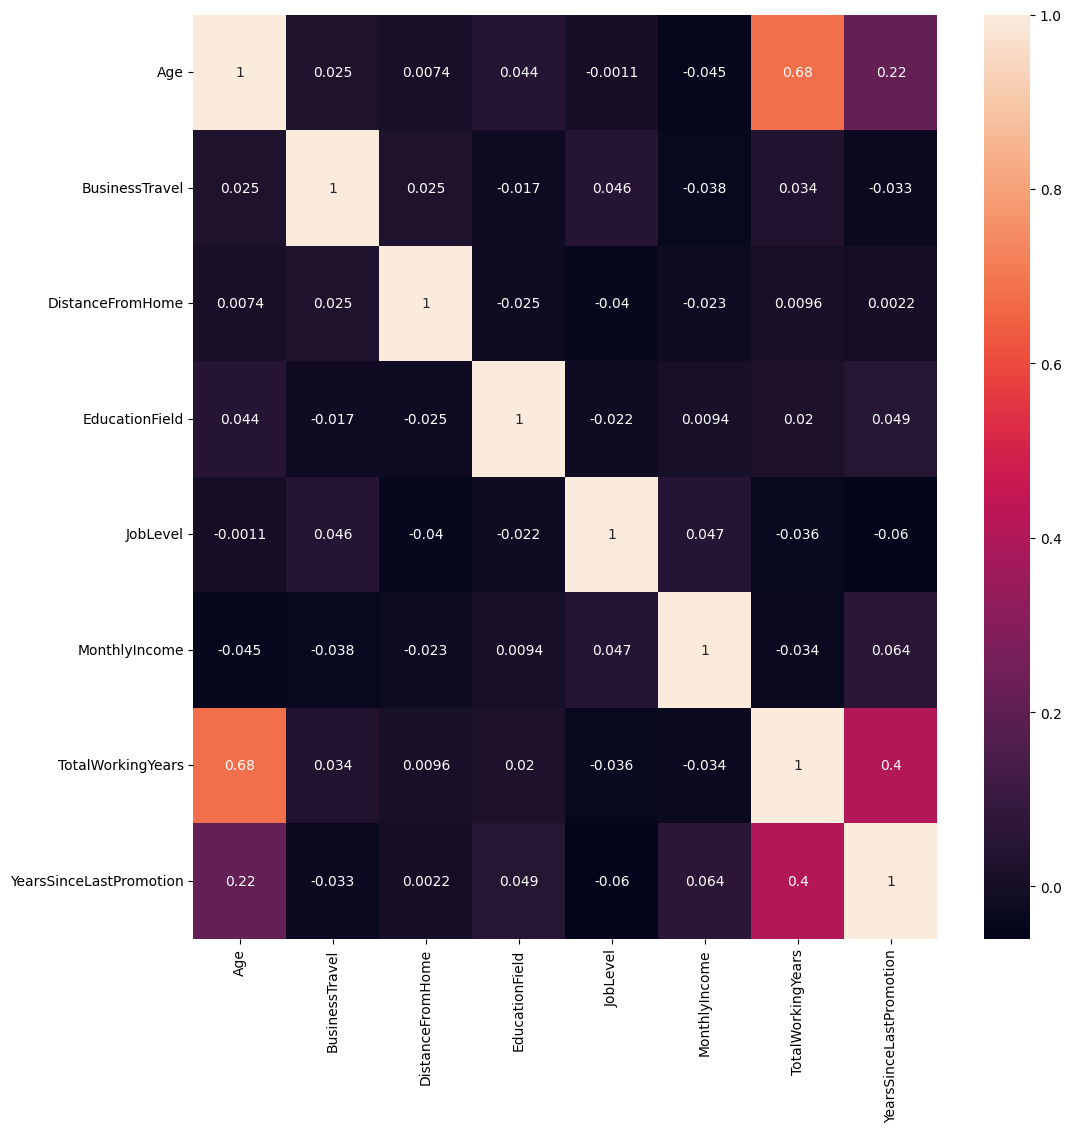

In [88]:
plt.figure(figsize=(12, 12))
sns.heatmap(dataset[['Age', 'BusinessTravel', 'DistanceFromHome', 'EducationField', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears', 'YearsSinceLastPromotion']].corr(), annot=True)


Create Training and Test Dataset

In [ ]:
train_dataset = dataset.copy
train_dataset = train_dataset()
test_dataset = dataset.copy
test_dataset = test_dataset()


Inspect data


In [ ]:
#Check for non-numerical information and convert categorical data
check_non_numerical_columns = [train_dataset, test_dataset]
def check_non_numerical_columns(datasets):
        for dataset in datasets:
          for column in dataset.columns:
            if train_dataset[column].dtype == 'object':
              print(f"Non-numerical data found in column: {column}")
              print(train_dataset[column].unique()) # Added and will test
              print()

In [ ]:
dataset.head()

MonthlyIncome and ANOVA


In [ ]:
#create train_anova dataset to ensure data integrity
def train_anova(train_dataset):
    anova_data = train_dataset[['MonthlyIncome', 'Attrition']].copy()
    return anova_data

anova_data = train_anova(train_dataset)

In [ ]:
#Fit an ANOVA model to determine if strong relationship exist btw MonthlyIncome and Attrition
anova_data = train_anova(train_dataset)
anova_model = ols('Attrition ~ M(MonthlyIncome)', data = anova_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=1)

#Print the ANOVA table
print(anova_table)

#Drop MonthlyIncome from datasets
train_dataset = train_dataset.drop(columns = ['MonthlyIncome'])
test_dataset = test_dataset.drop(columns=['MonthlyIncome'])

Build Decision Tree and Logistic Regression

In [ ]:
#Preprocess data
X=train_dataset.drop('Age', axis =1)
y= train_dataset['Age']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =42)

In [ ]:
#Create and Train Tree
clf = DecisionTreeClassifier(max_depth =4) #Customize parameters later (e.g., max_depth)
clf = clf.fit(X_train, y_train)


In [ ]:
#visualize results
plt.figure(figure =(20,10)) #Adjust figsize if needed
tree.plot_tree(clf, feature_names= X_train.columns, filled = True)
plt.show()